# Project: Wrangling and Analyze Data

## Table of Contents

1. [Data Gathering](#gathering)<br>
    1.1 [Twitter Archive data](#gathering)<br>
    1.2 [Downloading Image Prediction dataset](#image-prediction-request)<br>
    1.3 [Downloading Twitter API data](#twitter-api-data)
2. [Assessing Data](#Assessing-Data)<br>
    2.1 [Quality Issues Identified](#Quality-issues)<br>
    2.2 [Tidiness Issues Identified](#Tidiness-issues)
3. [Cleaning Data](#Cleaning-Data)<br>
    3.1 [Removing retweets from the dataset](#Issue-#1:-removing-retweets-from-the-dataset)<br>
    3.2 [Excess of useless columns in the master DataFrame](#Issue-#2:-excess-of-useless-columns-in-the-master-DataFrame)<br>
    3.3 [Separated columns for dog stage](#Issue-#3:-separated-columns-for-dog_stage)<br>
    3.4 [Column text with two different variables](#Issue-#4:-column-text-with-two-different-variables)<br>
    3.5 [Data from the API should be in the master DataFrame](#Issue-#5:-data-from-the-API-should-be-in-the-master-DataFrame)<br>
    3.6 [The possible breed should be included in the master DataFrame](#Issue-#6:-the-possible-breed-should-be-included-in-the-master-DataFrame)<br>
    3.7 [Unuseful tweets in the table (without picture associated)](#Issue-#7:-unuseful-tweets-in-the-table-(without-picture-associated))<br>
    3.8 [Missing data from the API](#Issue-#8:-missing-data-from-the-API)<br>
    3.9 [Erroneous datatypes](#Issue-#9:-erroneous-datatypes)<br>
    3.10 [HTML element in source column](#Issue-#10:-HTML-element-in-source-column)<br>
    3.11 [Tweet URL in text column](#Issue-#11:-tweet-URL-in-text-column)<br>
    3.12 [Invalid denominators in table](#Issue-#12:-invalid-denominators-in-table)<br>
    3.13 [Non-normalized ratings](#Issue-#13:-non-normalized-ratings)<br>
4. [Storing Data](#Storing-Data)
5. [Analyzing and Visualizing Data](#Analyzing-and-Visualizing-Data)

## Data Gathering

<a id="gathering"></a>

In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd

df_tweet = pd.read_csv('twitter-archive-enhanced.csv')
df_tweet.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [2]:
df_tweet.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)
<a id="image-prediction-request"></a>

In [3]:
import requests

file_name = 'image_predictions.tsv'
file_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

r = requests.get(file_url)

with open(file_name, mode='wb') as file:
    file.write(r.content)

df_image_predictions = pd.read_csv(file_name, sep='\t')
df_image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)
<a id="twitter-api-data"></a>

In [4]:
import tweepy
import os
import json
import time

file_name = 'tweet_json.txt'

# if the file exists, don't rerun the script (high time consumption)
if not os.path.isfile(file_name):
    bearer_token = os.environ.get('TWITTER_BEARER_TOKEN')
    twitter_client = tweepy.Client(bearer_token, wait_on_rate_limit=True)

    start_time = time.time()

    with open(file_name, mode='w') as file:
        for idx, row in df_tweet.iterrows():
            tweet = twitter_client.get_tweet(row.tweet_id, tweet_fields='public_metrics').data

            try:
                tweet_data = {
                    'id': tweet.id,
                    'text': tweet.text,
                    'retweet_count': tweet.public_metrics['retweet_count'],
                    'like_count': tweet.public_metrics['like_count'],
                    'reply_count': tweet.public_metrics['reply_count']
                }
            except Exception as e:
                tweet_data = {
                    'id': row.tweet_id,
                    'text': None,
                    'retweet_count': None,
                    'like_count': None,
                    'reply_count': None
                }

            json.dump(tweet_data, file)
            file.write('\n')

            i = 0
            if idx % 30 == 0:
                current_time = time.time()
                print(f'idx: {idx} - tweet_id: {row.tweet_id} - elapsed time: {round(current_time - start_time, 2)}s')

    end_time = time.time()

    print(f'time passed: {round(end_time - start_time, 2)}s')

In [5]:
tweet_api_data = []

with open(file_name, mode='r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_api_data.append(tweet)
    
df_tweet_api_data = pd.DataFrame(tweet_api_data)
df_tweet_api_data.head()

id                                               text  \
0  892420643555336193  This is Phineas. He's a mystical boy. Only eve...   
1  892177421306343426  This is Tilly. She's just checking pup on you....   
2  891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
3  891689557279858688  This is Darla. She commenced a snooze mid meal...   
4  891327558926688256  This is Franklin. He would like you to stop ca...   

   retweet_count  like_count  reply_count  
0         7132.0     34335.0        145.0  
1         5373.0     29770.0        172.0  
2         3536.0     22405.0        110.0  
3         7332.0     37506.0        143.0  
4         7878.0     35835.0        196.0

In [6]:
df_tweet_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2356 non-null   int64  
 1   text           2328 non-null   object 
 2   retweet_count  2328 non-null   float64
 3   like_count     2328 non-null   float64
 4   reply_count    2328 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 92.2+ KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
df_tweet.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [8]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
df_tweet_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2356 non-null   int64  
 1   text           2328 non-null   object 
 2   retweet_count  2328 non-null   float64
 3   like_count     2328 non-null   float64
 4   reply_count    2328 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 92.2+ KB


In [11]:
sum(df_tweet.tweet_id.duplicated())

0

In [12]:
sum(df_image_predictions.tweet_id.duplicated())

0

In [13]:
sum(df_tweet_api_data.id.duplicated())

0

In [14]:
df_tweet.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [15]:
df_tweet.query('rating_denominator == 0')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313  835246439529840640           8.352460e+17           26259576.0   

                     timestamp  \
313  2017-02-24 21:54:03 +0000   

                                                source  \
313  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
313  @jonnysun @Lin_Manuel ok jomny I know you're e...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp expanded_urls  \
313                       NaN                        NaN           NaN   

     rating_numerator  rating_denominator  name doggo floofer pupper puppo  
313               960                   0  None  None    None   None  None

In [16]:
df_tweet.query('rating_denominator != 10')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                 source  \
313   <a href="http://twitter.com/download/iphone" r...   
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                             

In [17]:
df_tweet.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Quality issues

#### `twitter_archive_enhanced` table

1. There is data from tweets without picture, retweets and unrelated posts, but they shouldn't be there as they are not useful for the further analysis.

2. Retweets should not be in the DataFrame, as we only want original dog ratings.

3. Excess of useless columns for analysis in the master DataFrame (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`)

4. Erroneous datatype (`timestamp`)

5. In `source` the values are stored as a HTML anchor, not only the app name used to post. 

6. In `text` is stored both the text and the URL of the original tweet, when should be only the text as the URL is not part of the tweet body itself.

7. *Null* values in `name`, `doggo`, `floffer`, `pupper` and `puppo` stored as the string "None".

8. Multiple missing values for the `dog_stage` columns (cannot be recovered).

9. A row with `rating_denominator` as 0 (division by zero is invalid).

10. There are multiple `rating_denominator` values, and it should be normalized to the same scale for better comparison.

#### `tweet_api_data` table

11. There are 28 tweets without data from the API - **missing values**
12. Erroneous datatypes (`retweet_count`, `like_count`, `reply_count`)

### Tidiness issues

1. The columns `doggo`, `floofer`, `pupper` and `puppo` are different values for the same variable: `dog_stage`.
2. The column `text` in `twitter_archive_enhanced` have both the text and the URL of the original tweet (two different variables).
3. The additional data gathered from API (`retweet_count`, `like_count` and `reply_count` in `tweet_api_data`) should be with the other tweets data, not in a separated dataframe as is related to the same observational unit.
4. The prediction for the breed should also be included in the main DataFrame, as it is related with the dog.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [18]:
# Make copies of original pieces of data
df_tweet_clean = df_tweet.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweet_api_data_clean = df_tweet_api_data.copy()

### Issue #1: removing retweets from the dataset

In [19]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Define:
Remove all the rows that are a retweets. They are identified for: 
* Columns related to *retweet* are **not null** (`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`)
* Column `text` starts with **"RT @"**

#### Code

In [20]:
df_tweet_clean = df_tweet_clean[df_tweet_clean.retweeted_status_id.isnull()]
df_tweet_clean = df_tweet_clean[df_tweet_clean.retweeted_status_user_id.isnull()]
df_tweet_clean = df_tweet_clean[df_tweet_clean.retweeted_status_timestamp.isnull()]

df_tweet_clean = df_tweet_clean[~df_tweet_clean.text.str.startswith('RT @')]

#### Test

In [21]:
df_tweet_clean[df_tweet_clean.text.isnull()].shape[0]

0

In [22]:
df_tweet_clean[df_tweet_clean.text.str.startswith('RT @')].shape[0]

0

In [23]:
df_tweet_clean.shape[0]

2175

### Issue #2: excess of useless columns in the master DataFrame

#### Define
Drop the following columns:

* `in_reply_to_status_id`
* `in_reply_to_user_id`
* `retweeted_status_id`
* `retweeted_status_user_id`
* `retweeted_status_timestamp`

#### Code

In [24]:
df_tweet_clean.drop(columns=['in_reply_to_status_id',
                             'in_reply_to_user_id',
                             'retweeted_status_id',
                             'retweeted_status_user_id',
                             'retweeted_status_timestamp'],
                    inplace=True)

#### Test

In [25]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue #3: separated columns for `dog_stage`

#### Define:
Restructure the `df_tweet` to have a new column called `dog_stage`, in which the values stored will be the respective columns `doggo`, `floofer`, `pupper` or `puppo`.

In the case of a picture if more than one category (two or more dogs in different stages), it will be assigned as *multiple_dogs*.

#### Code

In [26]:
import numpy as np

# Remove the string "None" to correctly assign the values with pd.melt()
df_tweet_clean.replace('None', '', inplace=True)

id_vars = df_tweet_clean.columns.tolist()[:-4]

df_tweet_clean = pd.melt(
    df_tweet_clean,
    id_vars=id_vars,
    value_name='dog_stage')

df_tweet_clean.drop(columns='variable', inplace=True)
df_tweet_clean.sort_values('dog_stage', inplace=True)


# Group the dataframe to merge the multiple rows into one with the dog_stage info (only different column)
columns_groupby = df_tweet_clean.columns.tolist()[:-1]
df_tweet_clean = df_tweet_clean.groupby(columns_groupby)['dog_stage'].apply(','.join).reset_index()

# Correct the values in the dog_stage column
df_tweet_clean['dog_stage'] = df_tweet_clean.dog_stage.str.replace(',,,', '')
df_tweet_clean['dog_stage'] = df_tweet_clean.dog_stage.str.replace(',,', '')
df_tweet_clean['dog_stage'] = df_tweet_clean.dog_stage.replace('', np.NaN)

list_multiple_dogs = ['doggo,pupper', 'doggo,floofer', 'doggo,puppo']
df_tweet_clean['dog_stage'] = df_tweet_clean.dog_stage.replace(list_multiple_dogs, 'multiple_dogs')

In [27]:
# Manually the ones classified as "multiple_dogs" to correct them
pd.set_option('display.max_colwidth', None)
df_tweet_clean.query('dog_stage == "multiple_dogs"')[['tweet_id', 'text', 'dog_stage']]

tweet_id  \
1215  733109485275860992   
1264  741067306818797568   
1366  751583847268179968   
1425  759793422261743616   
1552  781308096455073793   
1577  785639753186217984   
1667  801115127852503040   
1673  802265048156610565   
1698  808106460588765185   
1756  817777686764523521   
1953  854010172552949760   
1960  855851453814013952   

                                                                                                                                                                      text  \
1215                                                                                            Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda   
1264                                                                           This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC   
1366                              Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8   
1425                      Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll   
1552                                                                                                            Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u   
1577  This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd   
1667                      This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj   
1673                                                                                                 Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze   
1698                      Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho   
1756  This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7   
1953  At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk   
1960        Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel   

          dog_stage  
1215  multiple_dogs  
1264  multiple_dogs  
1366  multiple_dogs  
1425  multiple_dogs  
1552  multiple_dogs  
1577  multiple_dogs  
1667  multiple_dogs  
1673  multiple_dogs  
1698  multiple_dogs  
1756  multiple_dogs  
1953  multiple_dogs  
1960  multiple_dogs

In [28]:
# Correcting wrong classifications manually
tweets_to_correct = [
    {'id': 751583847268179968, 'dog_stage': np.NaN},
    {'id': 785639753186217984, 'dog_stage': np.NaN},
    {'id': 801115127852503040, 'dog_stage': 'pupper'},
    {'id': 817777686764523521, 'dog_stage': 'pupper'},
    {'id': 854010172552949760, 'dog_stage': 'doggo'},
    {'id': 855851453814013952, 'dog_stage': 'puppo'},
]

for tweet in tweets_to_correct:
    df_tweet_clean.loc[df_tweet_clean['tweet_id'] == tweet['id'], 'dog_stage'] = tweet['dog_stage']

#### Test

In [29]:
df_tweet_clean.dog_stage.value_counts()

pupper           224
doggo             73
puppo             24
floofer            9
multiple_dogs      6
Name: dog_stage, dtype: int64

In [30]:
df_tweet_clean.shape

(2117, 9)

In [31]:
df_tweet.shape

(2356, 17)

In [32]:
df_tweet.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [33]:
df_tweet_clean.query('tweet_id == 802265048156610565')

tweet_id                  timestamp  \
1673  802265048156610565  2016-11-25 21:37:47 +0000   

                                                                                  source  \
1673  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                       text  \
1673  Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze   

                                                        expanded_urls  \
1673  https://twitter.com/dog_rates/status/802265048156610565/photo/1   

      rating_numerator  rating_denominator name      dog_stage  
1673                11                  10       multiple_dogs

In [34]:
df_tweet_clean.dog_stage.value_counts()

pupper           224
doggo             73
puppo             24
floofer            9
multiple_dogs      6
Name: dog_stage, dtype: int64

In [35]:
idx = df_tweet_clean.query('dog_stage == "multiple_dogs"').tweet_id.tolist()
df_tweet.query('tweet_id in @idx')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
531   808106460588765185                    NaN                  NaN   
565   802265048156610565           7.331095e+17         4.196984e+09   
733   781308096455073793                    NaN                  NaN   
889   759793422261743616                    NaN                  NaN   
1063  741067306818797568                    NaN                  NaN   
1113  733109485275860992                    NaN                  NaN   

                      timestamp  \
531   2016-12-12 00:29:28 +0000   
565   2016-11-25 21:37:47 +0000   
733   2016-09-29 01:42:20 +0000   
889   2016-07-31 16:50:42 +0000   
1063  2016-06-10 00:39:48 +0000   
1113  2016-05-19 01:38:16 +0000   

                                                                                  source  \
531   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
565   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
733                      <a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>   
889   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1063  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1113  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                  text  \
531   Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho   
565                                                                              Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze   
733                                                                                         Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u   
889   Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll   
1063                                                       This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC   
1113                                                                        Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda   

      retweeted_status_id  retweeted_status_user_id  \
531                   NaN                       NaN   
565                   NaN                       NaN   
733                   NaN                       NaN   
889                   NaN                       NaN   
1063                  NaN                       NaN   
1113                  NaN                       NaN   

     retweeted_status_timestamp  \
531                         NaN   
565                         NaN   
733                         NaN   
889                         NaN   
1063                        NaN   
1113                        NaN   

                                                                                                                        expanded_urls  \
531                                                                   https://twitter.com/dog_rates/status/808106460588765185/photo/1   
565                                                                   https://twitter.com/dog_rates/status/802265048156610565/photo/1   
733                                                                                                     https://vine.co/v/5rgu2Law2ut   
889   https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1   
1063                                                                  https://twitter.com/dog_rates/status/741067306818797568/photo/1   
1113                                                                  https://twitter.c

### Issue #4: column `text` with two different variables

#### Define
Extract the tweet's URL from the columnn `text` and put it in a separated columns.

#### Code

In [36]:
df_tweet_clean['tweet_url'] = df_tweet_clean.text.str.extract(r' (https://.*)$', expand=True)

#### Test

In [37]:
test_samples = df_tweet.sample(10)
test_ids = test_samples.tweet_id.tolist()

test_samples[['tweet_id', 'text']].sort_values('tweet_id')

tweet_id  \
2217  668528771708952576   
2132  670079681849372674   
1963  673352124999274496   
1034  745057283344719872   
577   800855607700029440   
550   804738756058218496   
467   817120970343411712   
455   818307523543449600   
310   835309094223372289   
239   846874817362120707   

                                                                                                                                                               text  
2217                    This is Gòrdón. He enjoys his razberrita by pool. Not a care in the world. 12/10 this dog has a better life than me https://t.co/zpdBQCcYgW  
2132                   Meet Fabio. He's a wonderful pup. Can't stay away from the devil's lettuce but other than that he's a delight. 10/10 https://t.co/Qvj4JZGdQD  
1963                                                             *lets out a tiny screech and then goes into complete cardiac arrest* 12/10 https://t.co/az5PLGzVNJ  
1034                         This is Oliver. He's downright gorgeous as hell. Should be on the cover of Dogue. 12/10 would introduce to mom https://t.co/BkgU3rrsXA  
577                                                                                                  RT @Lin_Manuel: 11/10 would recommend. https://t.co/pnUF69K4xk  
550                                       This is Django. He accidentally opened the front facing camera. Did him quite the frighten. 12/10 https://t.co/kQVQoOW9NZ  
467                                                                                  Name a more iconic quartet... I'll wait. 13/10 for all https://t.co/kCLgD8687T  
455                    RT @dog_rates: Meet Moose. He doesn't want his friend to go back to college. 13/10 looks like you're staying home John https://t.co/LIhmM7i…  
310                                                                        RT @dog_rates: So this just changed my life. 13/10 please enjoy  https://t.co/dsv4xAtfv7  
239   This is Tuck. As you can see, he's rather h*ckin rare. Taken seriously until his legs are seen. Tail stuck in a permanent zoom. 13/10 https://t.co/P7PBGqrKSe

In [38]:
df_tweet_clean.query('tweet_id in @test_ids')[['tweet_id', 'text', 'tweet_url']].sort_values('tweet_id')

tweet_id  \
135   668528771708952576   
218   670079681849372674   
386   673352124999274496   
1292  745057283344719872   
1684  804738756058218496   
1751  817120970343411712   
1923  846874817362120707   

                                                                                                                                                               text  \
135                     This is Gòrdón. He enjoys his razberrita by pool. Not a care in the world. 12/10 this dog has a better life than me https://t.co/zpdBQCcYgW   
218                    Meet Fabio. He's a wonderful pup. Can't stay away from the devil's lettuce but other than that he's a delight. 10/10 https://t.co/Qvj4JZGdQD   
386                                                              *lets out a tiny screech and then goes into complete cardiac arrest* 12/10 https://t.co/az5PLGzVNJ   
1292                         This is Oliver. He's downright gorgeous as hell. Should be on the cover of Dogue. 12/10 would introduce to mom https://t.co/BkgU3rrsXA   
1684                                      This is Django. He accidentally opened the front facing camera. Did him quite the frighten. 12/10 https://t.co/kQVQoOW9NZ   
1751                                                                                 Name a more iconic quartet... I'll wait. 13/10 for all https://t.co/kCLgD8687T   
1923  This is Tuck. As you can see, he's rather h*ckin rare. Taken seriously until his legs are seen. Tail stuck in a permanent zoom. 13/10 https://t.co/P7PBGqrKSe   

                    tweet_url  
135   https://t.co/zpdBQCcYgW  
218   https://t.co/Qvj4JZGdQD  
386   https://t.co/az5PLGzVNJ  
1292  https://t.co/BkgU3rrsXA  
1684  https://t.co/kQVQoOW9NZ  
1751  https://t.co/kCLgD8687T  
1923  https://t.co/P7PBGqrKSe

### Issue #5: data from the API should be in the master DataFrame

#### Define
Merge the `df_tweet_api_data` DataFrame into the master `df_tweet` DataFrame.

#### Code

In [39]:
# First rename the id column to match in both dataframes
df_tweet_api_data_clean.rename({'id': 'tweet_id'}, axis=1, inplace=True)

# Drop the column 'text' from API to not duplicate it
df_tweet_api_data_clean.drop(columns=['text'], inplace=True)

# Merge on the left DF to avoid losing tweets not available in the API
df_tweet_clean = df_tweet_clean.merge(df_tweet_api_data_clean,
                                      how='left',
                                      on='tweet_id')

#### Test

In [40]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2117 non-null   int64  
 1   timestamp           2117 non-null   object 
 2   source              2117 non-null   object 
 3   text                2117 non-null   object 
 4   expanded_urls       2117 non-null   object 
 5   rating_numerator    2117 non-null   int64  
 6   rating_denominator  2117 non-null   int64  
 7   name                2117 non-null   object 
 8   dog_stage           336 non-null    object 
 9   tweet_url           2103 non-null   object 
 10  retweet_count       2109 non-null   float64
 11  like_count          2109 non-null   float64
 12  reply_count         2109 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 231.5+ KB


### Issue #6: the possible breed should be included in the master DataFrame

#### Define
Create a column in the master DF `df_tweet` with the most probable breed detected in `df_image_predictions`.

#### Code

In [41]:
df_tweet_clean['predicted_dog_breed'] = np.NaN
df_tweet_clean['picture_url'] = np.NaN

for idx, row in df_tweet_clean.iterrows():
    prediction = df_image_predictions_clean.query('tweet_id == @row.tweet_id')
    predicted_breed = np.NaN
    
    if not prediction.empty:
        picture_url = prediction.jpg_url.item()
        
        if prediction.p1_dog.bool():
            predicted_breed = prediction.p1.item()

        elif prediction.p2_dog.bool():
            predicted_breed = prediction.p2.item()

        elif prediction.p3_dog.bool():
            predicted_breed = prediction.p3.item()
    
    mask = df_tweet_clean.tweet_id == row.tweet_id

    df_tweet_clean.loc[mask, 'predicted_dog_breed'] = predicted_breed
    df_tweet_clean.loc[mask, 'picture_url'] = picture_url

#### Test

In [42]:
df_tweet_clean.sample(10)[['tweet_id', 'predicted_dog_breed', 'picture_url']]

tweet_id predicted_dog_breed  \
808   690248561355657216                 NaN   
1517  775842724423557120                chow   
747   686618349602762752          Rottweiler   
823   691096613310316544              borzoi   
755   687109925361856513              borzoi   
1842  831670449226514432            Pembroke   
1407  757611664640446465            bluetick   
963   702539513671897089          Pomeranian   
295   671362598324076544                 NaN   
231   670417414769758208                 NaN   

                                          picture_url  
808   https://pbs.twimg.com/media/CZRBZ9mWkAAWblt.jpg  
1517  https://pbs.twimg.com/media/CsRY1jAWYAUOx55.jpg  
747   https://pbs.twimg.com/media/CYdbvwjWcAEtjYu.jpg  
823   https://pbs.twimg.com/media/CZdEq-AUMAAWayR.jpg  
755   https://pbs.twimg.com/media/CYka1NTWMAAOclP.jpg  
1842  https://pbs.twimg.com/media/C4qv3JUW8AADirb.jpg  
1407  https://pbs.twimg.com/media/CoOTyXJXEAAtjs9.jpg  
963   https://pbs.twimg.com/media/Cb_r8qTUsAASgdF.jpg  
295   https://pbs.twimg.com/media/CVEouDRXAAEe8mt.jpg  
231   https://pbs.twimg.com/media/CU3NE8EWUAEVdPD.jpg

In [43]:
df_tweet_clean.predicted_dog_breed.value_counts()

golden_retriever        158
Labrador_retriever      108
Pembroke                 95
Chihuahua                91
pug                      62
                       ... 
Scotch_terrier            1
EntleBucher               1
Japanese_spaniel          1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: predicted_dog_breed, Length: 113, dtype: int64

### Issue #7: unuseful tweets in the table (without picture associated)

#### Define
Remove from the master DataFrame the tweets (rows) without associated picture in prediction DataFrame.

#### Code

In [44]:
df_merged = df_tweet_clean.merge(df_image_predictions_clean, how='left', on='tweet_id')
tweets_without_image = df_merged[df_merged.p1.isnull()].tweet_id.tolist()

df_tweet_clean = df_tweet_clean.query('tweet_id not in @tweets_without_image')

#### Test

In [45]:
print(df_tweet_clean.shape)
print(df_image_predictions_clean.shape)

(1994, 15)
(2075, 12)


### Issue #8: missing data from the API

#### Define
Delete tweets without the data from the API, as they are deleted tweets from the account, and therefore are not useful for further study as their statistics are not recoverable.

#### Code

In [46]:
df_tweet_clean = df_tweet_clean[
    (df_tweet_clean.retweet_count.notnull()) |
    (df_tweet_clean.like_count.notnull()) |
    (df_tweet_clean.reply_count.notnull())
]

#### Test

In [47]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2116
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             1986 non-null   int64  
 1   timestamp            1986 non-null   object 
 2   source               1986 non-null   object 
 3   text                 1986 non-null   object 
 4   expanded_urls        1986 non-null   object 
 5   rating_numerator     1986 non-null   int64  
 6   rating_denominator   1986 non-null   int64  
 7   name                 1986 non-null   object 
 8   dog_stage            303 non-null    object 
 9   tweet_url            1986 non-null   object 
 10  retweet_count        1986 non-null   float64
 11  like_count           1986 non-null   float64
 12  reply_count          1986 non-null   float64
 13  predicted_dog_breed  1678 non-null   object 
 14  picture_url          1986 non-null   object 
dtypes: float64(3), int64(3), object(9)
mem

### Issue #9: erroneous datatypes

#### Define
Change the datatypes of the following columns:

**df_tweet** table:
* `timestamp`: *datetime*
* `retweet_count`: *int*
* `like_count`: *int*
* `reply_count`: *int*

#### Code

In [48]:
df_tweet_clean.timestamp = pd.to_datetime(df_tweet_clean.timestamp, infer_datetime_format=True)
df_tweet_clean.retweet_count = df_tweet_clean.retweet_count.astype(int)
df_tweet_clean.like_count = df_tweet_clean.like_count.astype(int)
df_tweet_clean.reply_count = df_tweet_clean.reply_count.astype(int)

#### Test

In [49]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2116
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   tweet_id             1986 non-null   int64         
 1   timestamp            1986 non-null   datetime64[ns]
 2   source               1986 non-null   object        
 3   text                 1986 non-null   object        
 4   expanded_urls        1986 non-null   object        
 5   rating_numerator     1986 non-null   int64         
 6   rating_denominator   1986 non-null   int64         
 7   name                 1986 non-null   object        
 8   dog_stage            303 non-null    object        
 9   tweet_url            1986 non-null   object        
 10  retweet_count        1986 non-null   int64         
 11  like_count           1986 non-null   int64         
 12  reply_count          1986 non-null   int64         
 13  predicted_dog_breed  1678 non-nul

### Issue #10: HTML element in `source` column

#### Define
Extract the used app name from the HTML Anchor in `source` values.

#### Code

In [50]:
df_tweet_clean.source = df_tweet_clean.source.str.extract(r'^<.*>([\w\s]+)</a>$')

#### Test

In [51]:
df_tweet_clean.source.value_counts()

Twitter for iPhone    1948
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

### Issue #11: tweet URL in `text` column

#### Define
Remove the tweet URL from the `text` column.

#### Code

In [52]:
len(' https://t.co/t1bfwz5S2A')

24

In [53]:
df_tweet_clean.text = df_tweet_clean.text.str[:-24]

#### Test

In [54]:
df_tweet_clean.sample(10)[['tweet_id', 'text', 'tweet_url']]

tweet_id  \
99    667793409583771648   
1562  783085703974514689   
1198  729113531270991872   
1176  725786712245440512   
988   704819833553219584   
773   688116655151435777   
88    667530908589760512   
374   672997845381865473   
1764  819004803107983360   
1485  770787852854652928   

                                                                                                                     text  \
99                        Dogs only please. Small cows and other non canines will not be tolerated. Sick tattoos tho 8/10   
1562                        This is Earl. He can't catch. Did his best tho. 11/10 would repair confidence with extra pats   
1198                                                                                          "Challenge accepted"\n10/10   
1176              Say hello to Lillie. She's a Rutabagan Floofem. Poor pupper ate and then passed out. 11/10 relatable af   
988     This is Chesterson. He's a Bolivian Scoop Dog. Incredibly portable. Can't bark for shit tho. 7/10 would still pet   
773   Please send dogs. I'm tired of seeing other stuff like this dangerous pirate. We only rate dogs. Thank you... 10/10   
88                              Meet Naphaniel. He doesn't necessarily enjoy his day job, but he's damn good at it. 10/10   
374                        Say hello to Kenzie. She is a fluff ball. 12/10 you'd need to taser me for me to let go of her   
1764                                  This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet   
1485                  This is Winston. His tongue has gone rogue. Doing him quite a frighten. 10/10 hang in there Winston   

                    tweet_url  
99    https://t.co/s1z7mX4c9O  
1562  https://t.co/IsqyvbjFgM  
1198  https://t.co/vNjvr5Bl9u  
1176  https://t.co/uIdGqug9rw  
988   https://t.co/EatAd8JhyW  
773   https://t.co/YdLytdZOqv  
88    https://t.co/xoRWyQTcmy  
374   https://t.co/dph1UHNJrg  
1764  https://t.co/AdPKrI8BZ1  
1485  https://t.co/d0QEbp78Yi

### Issue #12: invalid denominators in table

#### Define
Find and remove or correct invalid ratings in the master table's `rating_denominator` (denominators different from 10 are likely to be wrong parsing).

#### Code

In [55]:
df_tweet_clean.query('rating_denominator != 10')[['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'tweet_url']]

tweet_id  \
20    666287406224695296   
501   675853064436391936   
564   677716515794329600   
678   682962037429899265   
705   684222868335505415   
706   684225744407494656   
898   697463031882764288   
980   704054845121142784   
1055  709198395643068416   
1075  710658690886586372   
1100  713900603437621249   
1126  716439118184652801   
1163  722974582966214656   
1208  731156023742988288   
1259  740373189193256964   
1414  758467244762497024   
1711  810984652412424192   
1775  820690176645140481   

                                                                                                                                                   text  \
20                                     This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10   
501                                                                 Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once   
564                                                                                                      IT'S PUPPERGEDDON. Total of 144/120 ...I think   
678                                 This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10   
705                                Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110   
706                                              Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you   
898                                                                                Happy Wednesday here's a bucket of pups. 44/40 would pet all at once   
980                                                                                          Here is a whole flock of puppers.  60/50 I'll take the lot   
1055                         From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once   
1075                                                               Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80   
1100                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody   
1126                                                      This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10   
1163                                                                                                           Happy 4/20 from the squad! 13/10 for all   
1208                                                  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once   
1259                               After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP   
1414                                                                                             Why does this never happen at my front door... 165/150   
1711  Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t   
1775                                                                        The floofs have been released I repeat the floofs have been released. 84/70   

      rating_numerator  rating_denominator                tweet_url  
20                   1                   2  https://t.co/d9NcXFKwLv  
501                 88                  80  https://t.co/y93p6FLvVw  
564                144                 120  https://t.co/ZanVtAtvIq  
678                  7                  11  https://t.co/7EsP8LmSp5  
705                121                 110  https://t.co/1zfnTJLt55  
706                143                 130  https://t.co/kRK51Y5ac3  
898                 44                  40  htt

In [56]:
list_invalid_ones = [810984652412424192]

df_tweet_clean = df_tweet_clean.query('tweet_id not in @list_invalid_ones')

In [57]:
def change_rating(tweet_id, numerator, denominator):
    mask = df_tweet_clean['tweet_id'] == tweet_id
    df_tweet_clean.loc[mask, 'rating_numerator'] = numerator
    df_tweet_clean.loc[mask, 'rating_denominator'] = denominator

In [58]:
list_to_change = [
    {'tid': 740373189193256964, 'n': 14, 'd': 10},
    {'tid': 722974582966214656, 'n': 13, 'd': 10},
    {'tid': 716439118184652801, 'n': 11, 'd': 10},
    {'tid': 682962037429899265, 'n': 10, 'd': 10},
    {'tid': 666287406224695296, 'n': 9, 'd': 10}
]

for t in list_to_change:
    change_rating(t['tid'], t['n'], t['d'])

#### Test

In [59]:
df_tweet_clean.query('tweet_id in @list_invalid_ones')

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, dog_stage, tweet_url, retweet_count, like_count, reply_count, predicted_dog_breed, picture_url]
Index: []

In [60]:
list_ids = [t['tid'] for t in list_to_change]
df_tweet_clean.query('tweet_id in @list_ids')[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

tweet_id  \
20    666287406224695296   
678   682962037429899265   
1126  716439118184652801   
1163  722974582966214656   
1259  740373189193256964   

                                                                                                                      text  \
20        This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10   
678    This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10   
1126                         This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10   
1163                                                                              Happy 4/20 from the squad! 13/10 for all   
1259  After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP   

      rating_numerator  rating_denominator  
20                   9                  10  
678                 10                  10  
1126                11                  10  
1163                13                  10  
1259                14                  10

### Issue #13: non-normalized ratings

#### Define
Create a column with a normalized score (between 0 and 10), taking into account the scale used in the rating (not all tweets are used in a x/10 scale).

#### Code

In [61]:
df_tweet_clean['normalized_numerator'] = (df_tweet_clean.rating_numerator / (df_tweet_clean.rating_denominator / 10)).astype(int)
df_tweet_clean['normalized_denominator'] = (df_tweet_clean.rating_denominator / (df_tweet_clean.rating_denominator / 10)).astype(int)

#### Test

In [62]:
df_tweet_clean.normalized_denominator.value_counts()

10    1985
Name: normalized_denominator, dtype: int64

In [63]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2116
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   tweet_id                1985 non-null   int64         
 1   timestamp               1985 non-null   datetime64[ns]
 2   source                  1985 non-null   object        
 3   text                    1985 non-null   object        
 4   expanded_urls           1985 non-null   object        
 5   rating_numerator        1985 non-null   int64         
 6   rating_denominator      1985 non-null   int64         
 7   name                    1985 non-null   object        
 8   dog_stage               303 non-null    object        
 9   tweet_url               1985 non-null   object        
 10  retweet_count           1985 non-null   int64         
 11  like_count              1985 non-null   int64         
 12  reply_count             1985 non-null   int64   

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
df_tweet_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [65]:
df_tweet_clean.describe()['normalized_numerator']

count    1985.000000
mean       11.692695
std        40.758599
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: normalized_numerator, dtype: float64

In [66]:
df_tweet_clean.dog_stage.value_counts()

pupper           205
doggo             63
puppo             23
floofer            7
multiple_dogs      5
Name: dog_stage, dtype: int64

### Insights:
1. Removing the outliers, we can see through the barplot that, besides the posts with zero rating, the tweets have a tendency of having more likes the higher is the rate given to the dog.

2. Although we have a very small amount of dogs classified by the stage, they have a very similar average ratings, with `floofer` and `puppo` leading the ranking with average of 12 points each.

3. The top 5 predicted breeds (Golden Retriever, Labrador, Pembroke, Chihuahua and Pug) sums to 534 tweets, which is 25% of the total (1735 predicted breeds).

4. If we look to the distribution of tweets per rating, it is a left-skewed distribution, that: the minimum rating is 0, first-quartile at 10, median at 11, third-quartile at 12 and maximum at 1776, what justify the high standard-deviation (40).

### Visualization

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
df_tweet_clean.groupby('rating_numerator').count()['tweet_id']

rating_numerator
0         2
1         4
2         9
3        19
4        15
5        33
6        32
7        51
8        95
9       151
10      418
11      397
12      448
13      258
14       36
26        1
27        1
44        1
45        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
420       1
1776      1
Name: tweet_id, dtype: int64

In [69]:
# only plot ratings with at least 2 dogs, to remove outliers
palette = sns.color_palette("light:#55aa99", n_colors=15)
sns.barplot(data=df_tweet_clean.query('normalized_numerator < 14'), x='normalized_numerator', y='like_count', ci=False, palette=palette)
plt.xlabel('Rating')
plt.ylabel('Average likes')
plt.title('Average likes per rating');

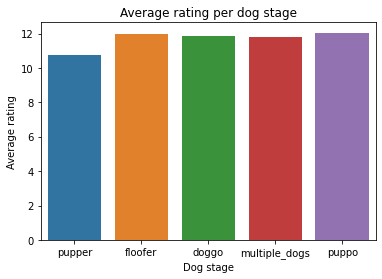

In [70]:
sns.barplot(data=df_tweet_clean, x='dog_stage', y='normalized_numerator', ci=False)
plt.title('Average rating per dog stage')
plt.xlabel('Dog stage')
plt.ylabel('Average rating');

In [71]:
df_tweet_clean.groupby('dog_stage').mean()['rating_numerator'].sort_values(ascending=False)

dog_stage
puppo            12.043478
floofer          12.000000
doggo            11.857143
multiple_dogs    11.800000
pupper           10.731707
Name: rating_numerator, dtype: float64

In [81]:
df_tweet_clean.dog_stage.count()

303

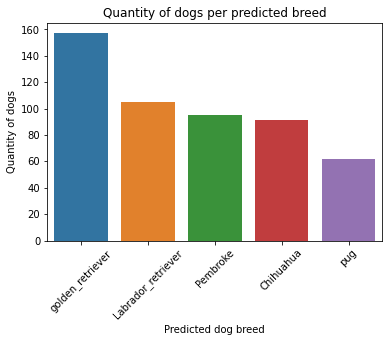

In [72]:
df_plot = df_tweet_clean.groupby('predicted_dog_breed').count().reset_index().sort_values('tweet_id', ascending=False).head(5)

sns.barplot(data=df_plot, x='predicted_dog_breed', y='tweet_id');
plt.xticks(rotation=45)
plt.xlabel('Predicted dog breed')
plt.ylabel('Quantity of dogs')
plt.title('Quantity of dogs per predicted breed');

In [73]:
df_plot.sum()['tweet_id']

510

In [74]:
df_plot.sum()['tweet_id'] / df_tweet_clean.shape[0]

0.25692695214105793

In [75]:
df_tweet_clean.predicted_dog_breed.count()

1677

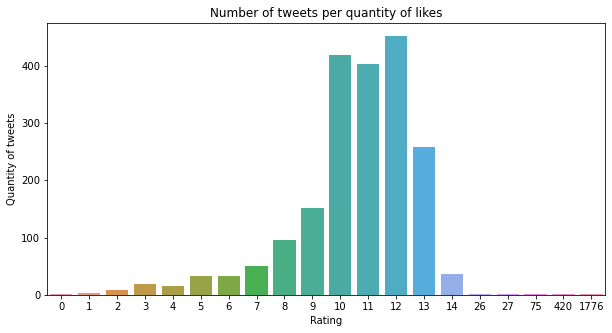

In [76]:
df_plot = df_tweet_clean.groupby('normalized_numerator').count().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=df_plot, x='normalized_numerator', y='tweet_id')
plt.title('Number of tweets per quantity of likes')
plt.xlabel('Rating')
plt.ylabel('Quantity of tweets');

In [77]:
df_tweet_clean.timestamp.min()

Timestamp('2015-11-15 22:32:08')

In [78]:
df_tweet_clean.timestamp.max()

Timestamp('2017-08-01 16:23:56')

In [79]:
df_tweet_clean.dog_stage.count()

303

In [80]:
df_tweet_clean.shape

(1985, 17)

In [83]:
df_tweet_clean.query('normalized_numerator == 1')

tweet_id           timestamp              source  \
17   666104133288665088 2015-11-16 04:02:55  Twitter for iPhone   
93   667549055577362432 2015-11-20 03:44:31  Twitter Web Client   
259  670783437142401025 2015-11-29 01:56:48  Twitter for iPhone   
476  675153376133427200 2015-12-11 03:21:23  Twitter for iPhone   

                                                                                                                     text  \
17         Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10   
93   Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10   
259      Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10   
476                     What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table   

                                                       expanded_urls  \
17   https://twitter.com/dog_rates/status/666104133288665088/photo/1   
93   https://twitter.com/dog_rates/status/667549055577362432/photo/1   
259  https://twitter.com/dog_rates/status/670783437142401025/photo/1   
476  https://twitter.com/dog_rates/status/675153376133427200/photo/1   

     rating_numerator  rating_denominator name dog_stage  \
17                  1                  10            NaN   
93                  1                  10            NaN   
259                 1                  10            NaN   
476                 1                  10            NaN   

                   tweet_url  retweet_count  like_count  reply_count  \
17   https://t.co/Asgdc6kuLX           5595       13125          110   
93   https://t.co/i9iSGNn3fx           1991        5192           64   
259  https://t.co/jxukeh2BeO            342         750            7   
476  https://t.co/RDXCfk8hK0           2305        5697           47   

    predicted_dog_breed                                      picture_url  \
17                  NaN  https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
93                  NaN  https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg   
259                 NaN  https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg   
476                 NaN  https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg   

     normalized_numerator  normalized_denominator  
17                      1                      10  
93                      1                      10  
259                     1                      10  
476                     1                      10